# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import random

In [2]:
data = pd.read_csv('orange_small_churn_data.train')
data

Var1  Var2  Var3  Var4  Var5    Var6  Var7  Var8  Var9  Var10  ...  \
0       NaN   NaN   NaN   NaN   NaN  3052.0   NaN   NaN   NaN    NaN  ...   
1       NaN   NaN   NaN   NaN   NaN  1813.0   7.0   NaN   NaN    NaN  ...   
2       NaN   NaN   NaN   NaN   NaN  1953.0   7.0   NaN   NaN    NaN  ...   
3       NaN   NaN   NaN   NaN   NaN  1533.0   7.0   NaN   NaN    NaN  ...   
4       NaN   NaN   NaN   NaN   NaN   686.0   7.0   NaN   NaN    NaN  ...   
...     ...   ...   ...   ...   ...     ...   ...   ...   ...    ...  ...   
39995   NaN   NaN   NaN   NaN   NaN   938.0   7.0   NaN   NaN    NaN  ...   
39996   NaN   NaN   NaN   NaN   NaN  1750.0   7.0   NaN   NaN    NaN  ...   
39997   NaN   NaN   NaN   NaN   NaN  1204.0   7.0   NaN   NaN    NaN  ...   
39998   NaN   NaN   NaN   NaN   NaN  8232.0  14.0   NaN   NaN    NaN  ...   
39999   NaN   NaN   NaN   NaN   NaN   217.0   0.0   NaN   NaN    NaN  ...   

        Var221   Var222      Var223  Var224  Var225  Var226   Var227  \
0      Al6ZaUT  vr93T2a  LM8l689qOp     NaN     NaN    fKCe  02N6s8f   
1         oslk  6hQ9lNX  LM8l689qOp     NaN    ELof    xb3V     RAYp   
2         zCkv  catzS2D  LM8l689qOp     NaN     NaN    FSa2     ZI9m   
3         oslk  e4lqvY0  LM8l689qOp     NaN     NaN    xb3V     RAYp   
4         oslk  MAz3HNj  LM8l689qOp     NaN     NaN    WqMG     RAYp   
...        ...      ...         ...     ...     ...     ...      ...   
39995     oslk  8xSqDjb  LM8l689qOp     NaN    kG3k    FSa2     RAYp   
39996     oslk  WUmqPCU  LM8l689qOp     NaN     NaN    WqMG     RAYp   
39997     oslk  pHOw_BK  LM8l689qOp     NaN    ELof    WqMG     RAYp   
39998     oslk  WC7Esaq  LM8l689qOp     NaN     NaN    wX53     RAYp   
39999     oslk  R2LdzOv  LM8l689qOp     NaN     NaN    FSa2     RAYp   

              Var228  Var229  Var230  
0      xwM2aC7IdeMC0     NaN     NaN  
1            55YFVY9    mj86     NaN  
2      ib5G6X1eUxUn6    mj86     NaN  
3      F2FyR07IdsN7I     NaN     NaN  
4      F2FyR07IdsN7I     NaN     NaN  
...              ...     ...     ...  
39995  F2FyR07IdsN7I    mj86     NaN  
39996  F2FyR07IdsN7I     NaN     NaN  
39997  F2FyR07IdsN7I    am7c     NaN  
39998  F2FyR07IdsN7I     NaN     NaN  
39999  F2FyR07IdsN7I     NaN     NaN  

[40000 rows x 230 columns]

In [3]:
labels = pd.read_csv('orange_small_churn_labels.train', header=None)
labels.columns = ['labels']
labels

labels
0          -1
1          -1
2          -1
3           1
4          -1
...       ...
39995      -1
39996      -1
39997      -1
39998      -1
39999      -1

[40000 rows x 1 columns]

2\. Рассчитайте доли классов `отток` и `не отток`.

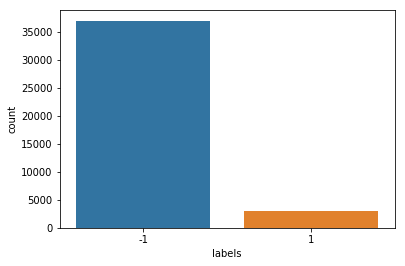

In [6]:
sns.countplot(labels.labels)
plt.show()

In [7]:
count = labels.labels.value_counts()
print (f' Отток: {count[1]/labels.shape[0]} \n Не отток: {count[-1]/labels.shape[0]}')

 Отток: 0.0744 
 Не отток: 0.9256


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 



Для бинарных пар можно использовать корреляцию Мэьтьюса

Для категориальных пар - Коэффициент V Крамера

Для смешанных пар категориальных и непрерывных величин используем разность их математических ожиданий.

In [18]:
num_data = data.iloc[:, :190]
num_data['labels'] = labels
cat_data = data.iloc[:, 190:230]
cat_data['labels'] = labels

In [9]:
num_data

Var1  Var2  Var3  Var4  Var5     Var6  Var7  Var8  Var9     Var10  ...  \
0       NaN   NaN   NaN   NaN   NaN   3052.0   NaN   NaN   NaN       NaN  ...   
1       NaN   NaN   NaN   NaN   NaN   1813.0   7.0   NaN   NaN       NaN  ...   
2       NaN   NaN   NaN   NaN   NaN   1953.0   7.0   NaN   NaN       NaN  ...   
3       NaN   NaN   NaN   NaN   NaN   1533.0   7.0   NaN   NaN       NaN  ...   
4       NaN   NaN   NaN   NaN   NaN    686.0   7.0   NaN   NaN       NaN  ...   
5       0.0   NaN   NaN   NaN   NaN      NaN   NaN   NaN  30.0       NaN  ...   
6       NaN   NaN   NaN   NaN   NaN    889.0   0.0   NaN   NaN       NaN  ...   
7       NaN   NaN   NaN   NaN   NaN    161.0   0.0   NaN   NaN       NaN  ...   
8       NaN   NaN   NaN   NaN   NaN    420.0   0.0   NaN   NaN       NaN  ...   
9       NaN   NaN   NaN   NaN   NaN   1155.0   0.0   NaN   NaN       NaN  ...   
10      NaN   NaN   NaN   NaN   NaN    147.0   0.0   NaN   NaN       NaN  ...   
11      NaN   NaN   NaN   NaN   NaN    539.0   0.0   NaN   NaN       NaN  ...   
12      NaN   NaN   NaN   NaN   NaN    462.0  14.0   NaN   NaN       NaN  ...   
13      NaN   NaN   NaN   NaN   NaN   1687.0   0.0   NaN   NaN       NaN  ...   
14      NaN   NaN   NaN   NaN   NaN    819.0   7.0   NaN   NaN       NaN  ...   
15      NaN   NaN   NaN   NaN   NaN    637.0   0.0   NaN   NaN       NaN  ...   
16      NaN   NaN   NaN   NaN   NaN    231.0   7.0   NaN   NaN       NaN  ...   
17      NaN   NaN   NaN   0.0   NaN      NaN   NaN   NaN   NaN       NaN  ...   
18      NaN   NaN   NaN   NaN   NaN    574.0   7.0   NaN   NaN       NaN  ...   
19      NaN   NaN   NaN   NaN   0.0      NaN   NaN   NaN   NaN  222237.0  ...   
20      NaN   NaN   NaN   NaN   NaN      0.0   0.0   NaN   NaN       NaN  ...   
21      NaN   NaN   NaN   NaN   NaN    301.0   7.0   NaN   NaN       NaN  ...   
22      NaN   NaN   NaN   NaN   NaN   3941.0   7.0   NaN   NaN       NaN  ...   
23      NaN   NaN   NaN   0.0   NaN      NaN   NaN   NaN   NaN       NaN  ...   
24      NaN   NaN   NaN   NaN   NaN    147.0   0.0   NaN   NaN       NaN  ...   
25      NaN   NaN   NaN   NaN   NaN   3262.0  14.0   NaN   NaN       NaN  ...   
26      NaN   NaN   NaN   NaN   NaN    798.0   7.0   NaN   NaN       NaN  ...   
27      NaN   NaN   NaN   NaN   NaN   1323.0   7.0   NaN   NaN       NaN  ...   
28      NaN   NaN   NaN   NaN   NaN    938.0   7.0   NaN   NaN       NaN  ...   
29      NaN   NaN   NaN   NaN   NaN    252.0   0.0   NaN   NaN       NaN  ...   
...     ...   ...   ...   ...   ...      ...   ...   ...   ...       ...  ...   
39970   NaN   NaN   NaN   NaN   NaN    322.0   0.0   NaN   NaN       NaN  ...   
39971   NaN   NaN   NaN   NaN   NaN    231.0   0.0   NaN   NaN       NaN  ...   
39972   NaN   NaN   NaN   NaN   NaN    511.0   7.0   NaN   NaN       NaN  ...   
39973   NaN   NaN   NaN   NaN   NaN    161.0   0.0   NaN   NaN       NaN  ...   
39974   NaN   NaN   NaN   NaN   NaN   1365.0   0.0   NaN   NaN       NaN  ...   
39975   NaN   NaN   NaN   NaN   NaN    665.0   7.0   NaN   NaN       NaN  ...   
39976   NaN   NaN   NaN   NaN   NaN   3353.0  14.0   NaN   NaN       NaN  ...   
39977   NaN   NaN   NaN   NaN   NaN    539.0   7.0   NaN   NaN       NaN  ...   
39978   NaN   NaN   NaN   NaN   NaN    819.0   0.0   NaN   NaN       NaN  ...   
39979   NaN   NaN   NaN   NaN   NaN    882.0  14.0   NaN   NaN       NaN  ...   
39980   NaN   NaN   NaN   NaN   NaN    791.0   7.0   NaN   NaN       NaN  ...   
39981   NaN   NaN   NaN   NaN   NaN    140.0   7.0   NaN   NaN       NaN  ...   
39982   NaN   NaN   NaN   NaN   NaN   1176.0   7.0   NaN   NaN       NaN  ...   
39983   NaN   NaN   NaN   NaN   NaN    315.0   0.0   NaN   NaN       NaN  ...   
39984   NaN   NaN   NaN   NaN   NaN      0.0   0.0   NaN   NaN       NaN  ...   
39985   NaN   0.0   0.0   NaN   NaN      NaN   NaN   NaN   NaN       NaN  ...   
39986   NaN   NaN   NaN   NaN   NaN   1995.0   7.0   NaN   NaN       NaN  ...   
39987   NaN   NaN   NaN   NaN   NaN   

In [10]:
temp = num_data[['Var'+str(10),'labels']].dropna()
len(temp)

1165

In [11]:
num_data.loc[0,:]

Var1           NaN
Var2           NaN
Var3           NaN
Var4           NaN
Var5           NaN
Var6        3052.0
Var7           NaN
Var8           NaN
Var9           NaN
Var10          NaN
Var11          NaN
Var12          NaN
Var13          NaN
Var14          NaN
Var15          NaN
Var16          NaN
Var17          NaN
Var18          NaN
Var19          NaN
Var20          NaN
Var21        480.0
Var22        600.0
Var23          NaN
Var24         20.0
Var25        480.0
Var26          NaN
Var27          NaN
Var28        200.0
Var29          NaN
Var30          NaN
            ...   
Var162         NaN
Var163    599532.0
Var164         NaN
Var165         NaN
Var166         NaN
Var167         NaN
Var168         NaN
Var169         NaN
Var170         NaN
Var171         NaN
Var172         NaN
Var173         0.0
Var174         NaN
Var175         NaN
Var176         NaN
Var177         NaN
Var178         NaN
Var179         NaN
Var180         NaN
Var181         0.0
Var182         NaN
Var183      

In [28]:
def corrwithbin(df, feature, temp):
    value = temp.iloc[:,0]
    label = temp.iloc[:,1]
    # будем отбирать только те признаки, в которых есть не менее 10000 not Nan величин
   # if len(value) < 1000:
   #     corr =0
   # else:
    corr = abs(value[label == 1].mean()) - abs(value[label == -1].mean())
    df.loc[len(df)] = [feature, np.abs(corr), len(value[label == 1]), len(value[label == -1])]
    return df

In [29]:
correlation = pd.DataFrame(columns= ['feature', 'corr', 'label = 1', 'label = -1'])
for i in range(len(num_data.loc[0,:]) - 1):
    temp = num_data[['Var'+str(i+1),'labels']].dropna()
    correlation = corrwithbin(correlation,'Var'+str(i+1),temp)

In [32]:
correlation.dropna(inplace=True)
correlation.sort_values(['corr'], inplace=True, ascending = False)
correlation[:60]

feature          corr label = 1 label = -1
130  Var131  1.034608e+07        35        535
68    Var69  4.808584e+05        56       1109
52    Var53  4.389077e+05        35        535
176  Var177  4.017487e+05        41        965
179  Var180  3.201630e+05        35        535
113  Var114  2.416347e+05        41        965
110  Var111  1.931651e+05        41        849
112  Var113  1.628422e+05      2976      37024
152  Var153  1.514534e+05      2789      33195
153  Var154  1.417316e+05        35        535
58    Var59  1.306361e+05        37        625
123  Var124  1.220040e+05        55       1220
9     Var10  1.017569e+05        56       1109
32    Var33  9.808497e+04        33        627
138  Var139  9.586470e+04        56       1109
37    Var38  7.767100e+04      2789      33195
4      Var5  6.694987e+04        56       1109
181  Var182  6.161478e+04        55       1220
35    Var36  5.799337e+04        41        965
91    Var92  5.758846e+04         9        131
75    Var76  5.678068e+04      2789      33195
149  Var150  4.557850e+04        55       1220
107  Var108  4.515847e+04        35        535
161  Var162  4.456118e+04        41        965
170  Var171  4.157037e+04        43        828
85    Var86  4.061467e+04        35        535
36    Var37  3.795249e+04        55       1220
69    Var70  3.612266e+04        56       1109
135  Var136  3.073186e+04        35        528
148  Var149  2.953667e+04      2575      31609
55    Var56  2.209483e+04        27        497
79    Var80  1.771152e+04        56       1109
133  Var134  1.494272e+04      2789      33195
182  Var183  1.454337e+04        41        965
80    Var81  1.437956e+04      2759      32806
132  Var133  1.238965e+04      2789      33195
97    Var98  1.067012e+04        30        434
162  Var163  1.047529e+04      2789      33195
93    Var94  9.689091e+03      1591      20472
57    Var58  9.174274e+03        35        535
105  Var106  9.118277e+03        55       1220
50    Var51  8.359625e+03       169       2821
164  Var165  8.230840e+03        33        667
94    Var95  8.222667e+03        41        965
116  Var117  7.494656e+03        55       1220
124  Var125  5.315397e+03      2745      32815
189  Var190  5.216923e+03        17        249
101  Var102  1.083259e+03        22        345
44    Var45  9.605852e+02        15        269
63    Var64  6.301450e+02        10        180
12    Var13  4.828914e+02      2745      32815
139  Var140  4.462020e+02      2745      32815
5      Var6  2.054732e+02      2759      32806
2      Var3  1.677830e+02        41        964
118  Var119  8.953570e+01      2759      32806
167  Var168  5.805165e+01        35        535
187  Var188  5.459477e+01        41        965
70    Var71  5.363285e+01        41        849
147  Var148  5.177650e+01        56       1109
73    Var74  4.968256e+01      2745      32815

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [45]:
top20 = correlation.feature.iloc[:20]
top20['labels'] = ('labels')
top20

22        Var113
33        Var153
9          Var38
15         Var76
32        Var149
28        Var134
17         Var81
27        Var133
35        Var163
25        Var125
2          Var13
29        Var140
0           Var6
23        Var119
14         Var74
4          Var22
3          Var21
13         Var73
6          Var25
7          Var28
labels    labels
Name: feature, dtype: object

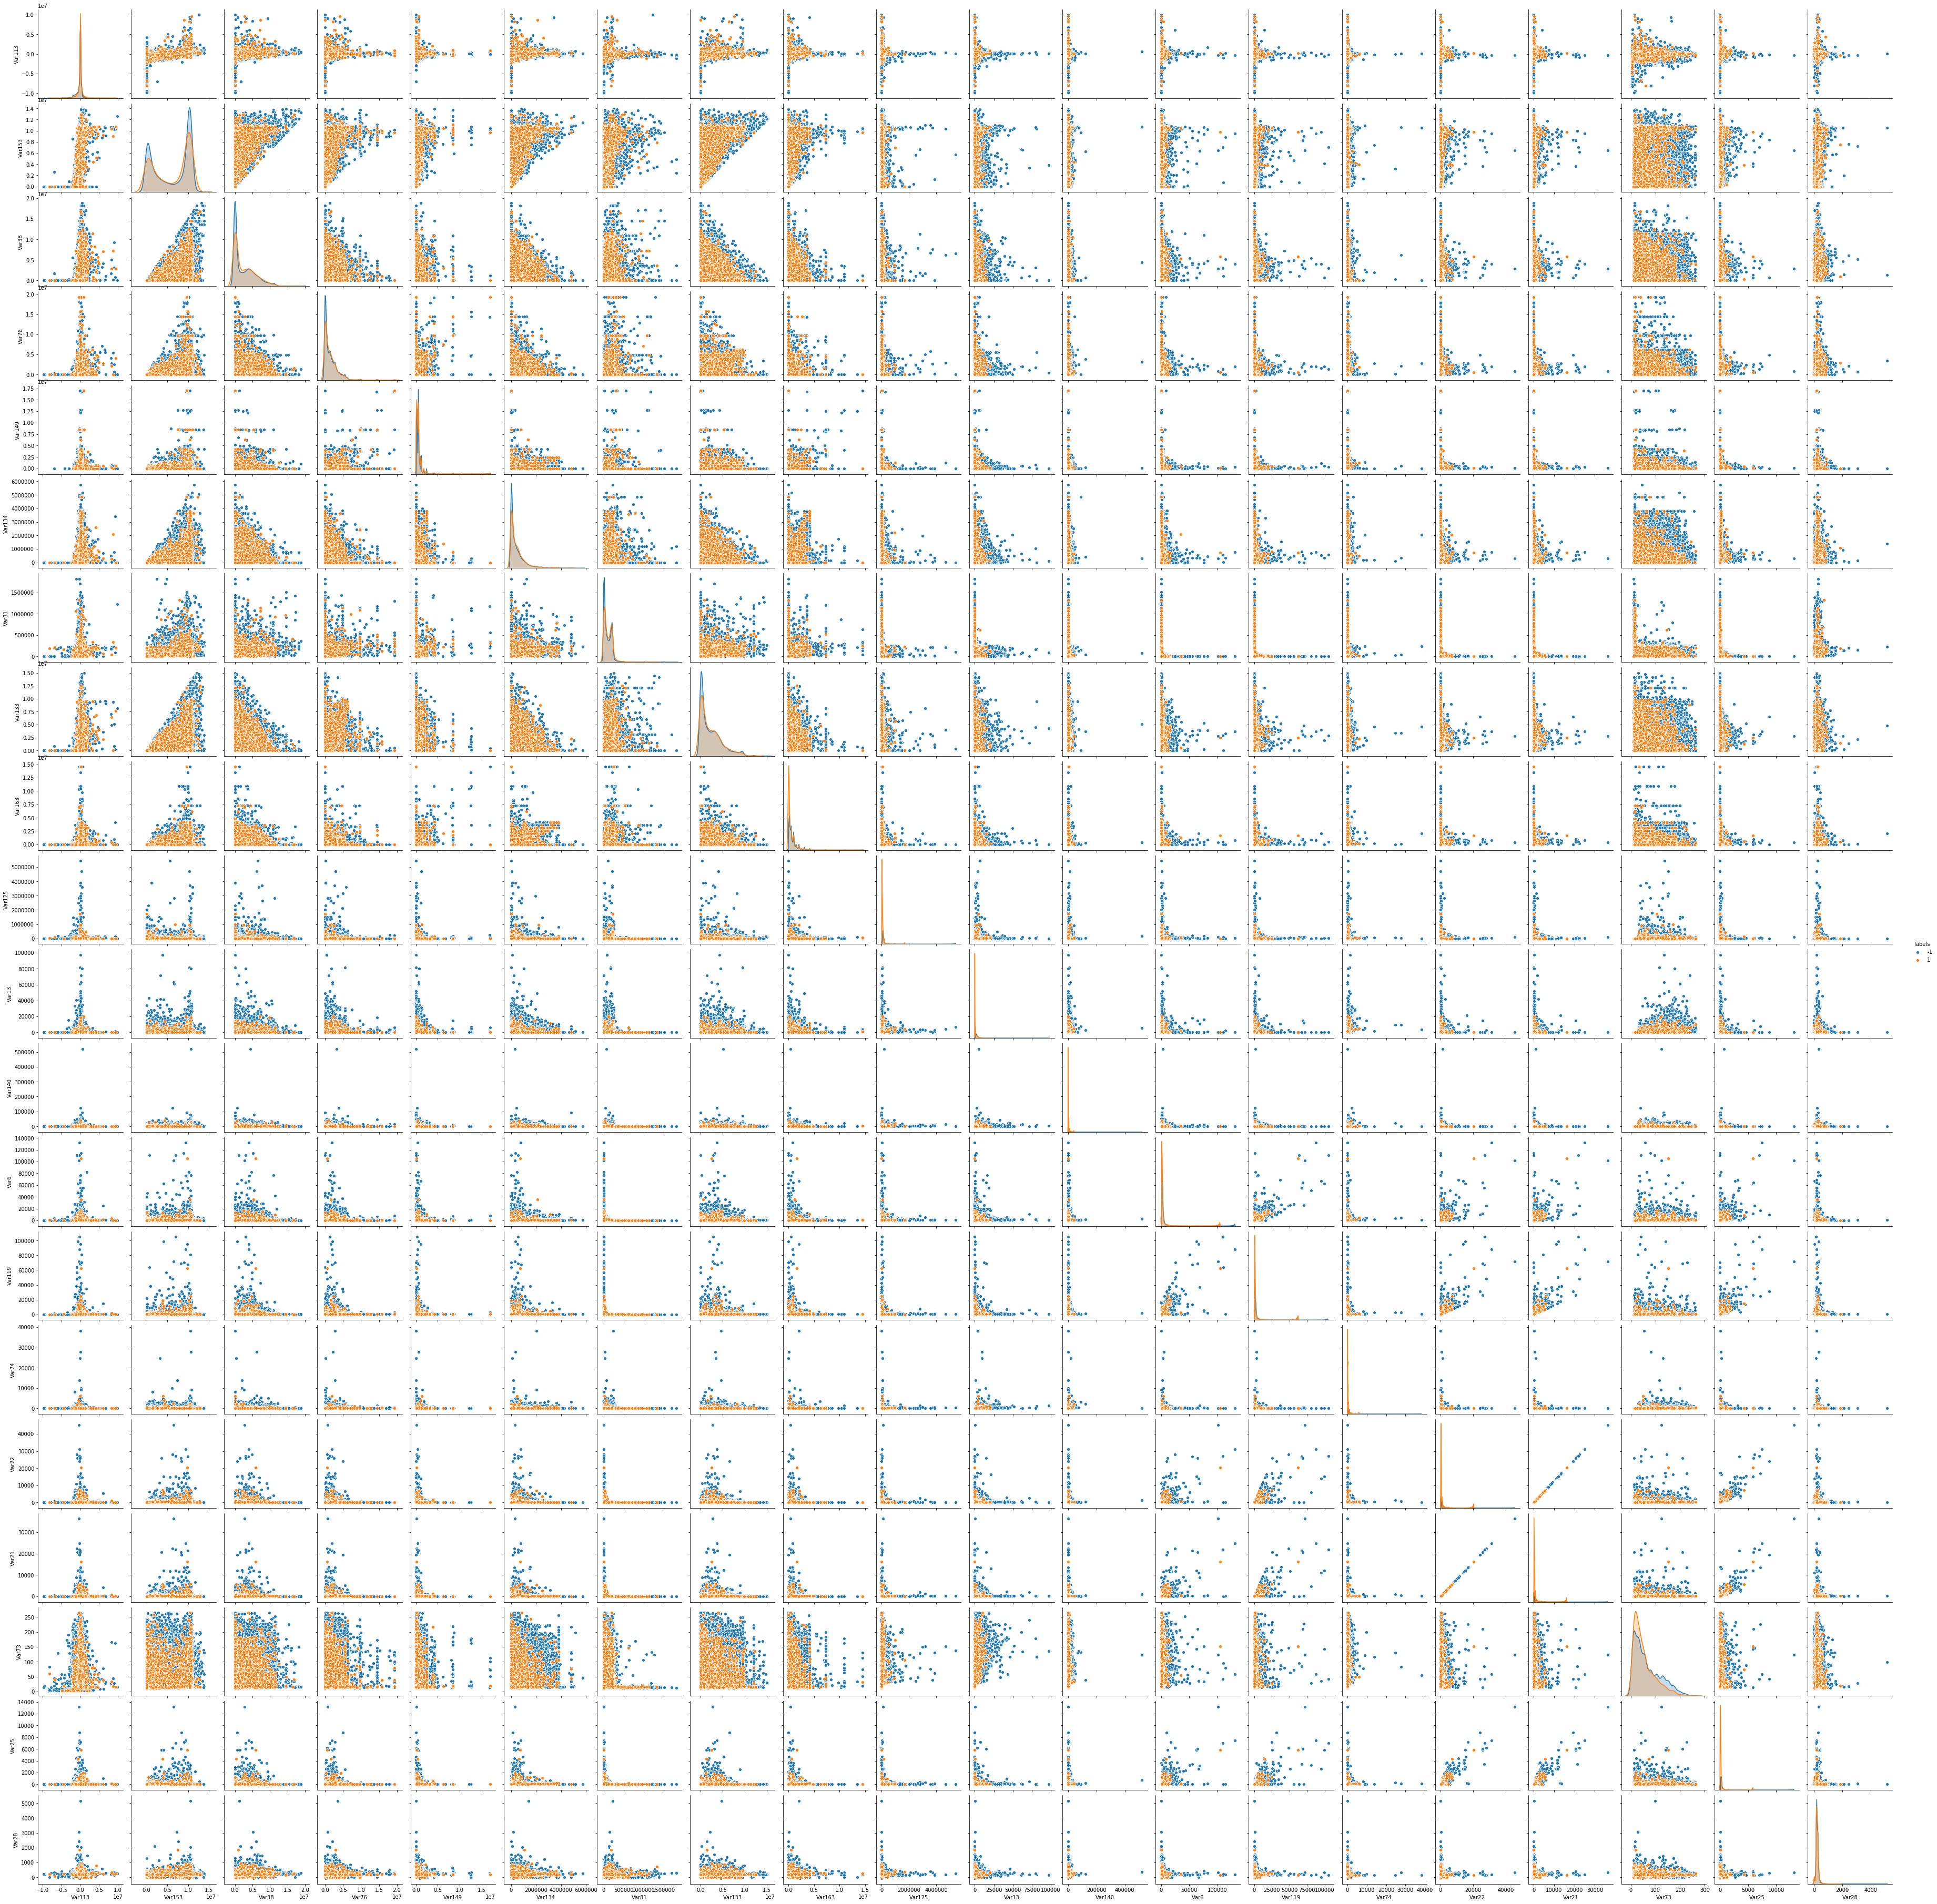

In [46]:
sns.pairplot(num_data[top20], hue="labels", diag_kind="kde")

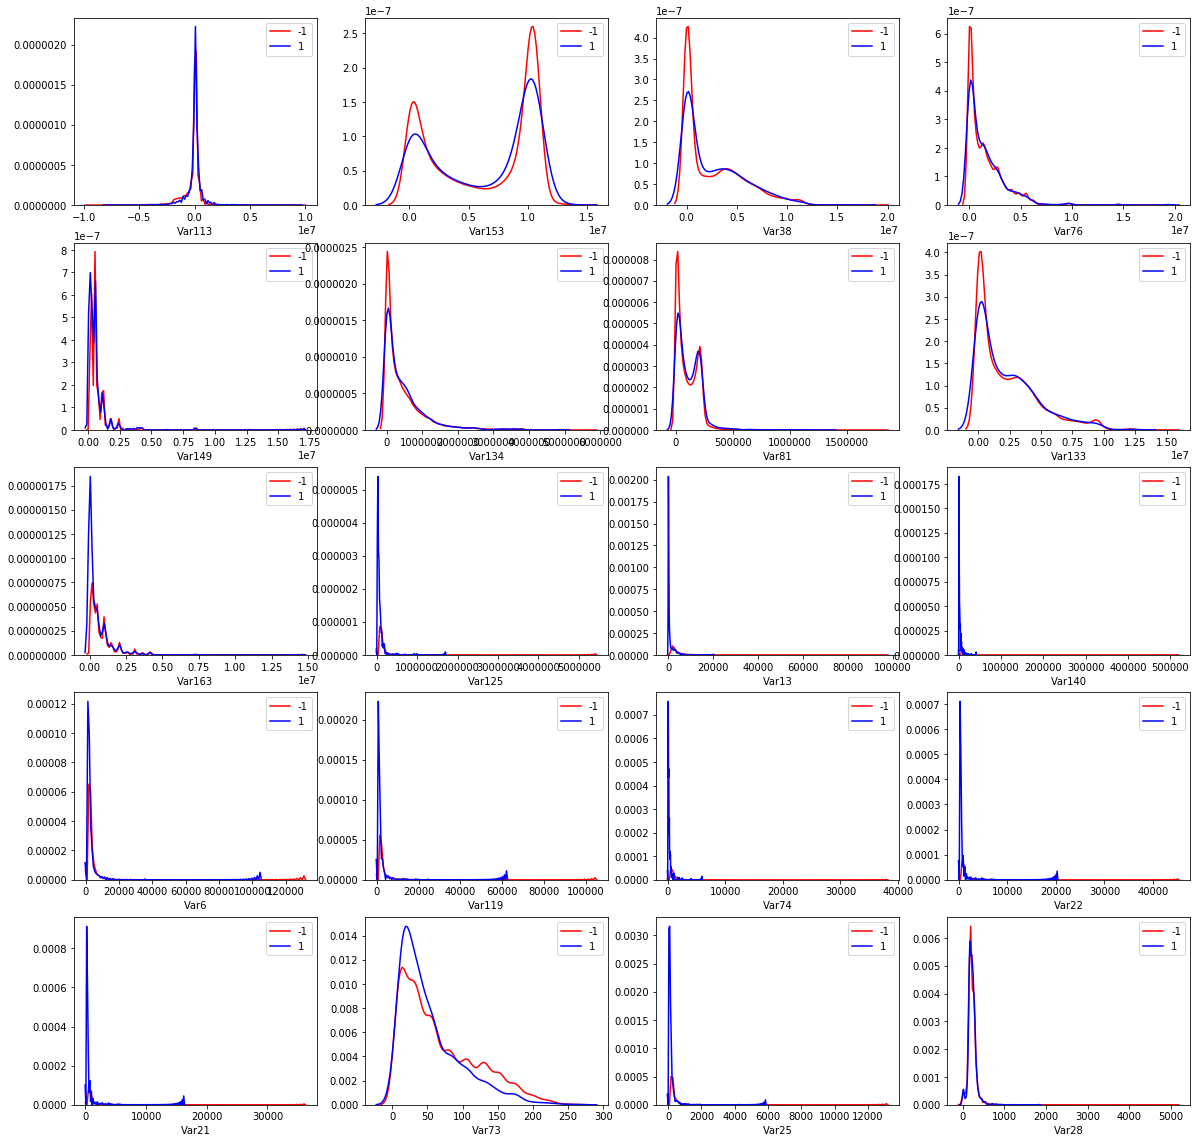

In [47]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
for idx, feature in enumerate(top20[:20]):
    sns.kdeplot(num_data.loc[num_data.labels == -1, feature], color = 'r', ax=axes[int(idx / 4), int(idx % 4)], label=-1)
    sns.kdeplot(num_data.loc[num_data.labels == 1, feature], color = 'b', ax=axes[int(idx / 4), int(idx % 4)], label=1)
    axes[int(idx/ 4), int(idx % 4)].set(xlabel=feature)


5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [42]:
random10 = random.sample(list(correlation.feature), 10)#[random.choice(correlation.feature) for i in range(10)]
print(random10)


['Var149', 'Var144', 'Var134', 'Var109', 'Var73', 'Var160', 'Var76', 'Var125', 'Var132', 'Var28']


<bound method Random.choice of <random.Random object at 0x0000018A02E07CA8>>

In [43]:
random_data = num_data[random10]
random_data['labels'] = num_data['labels']
random_data

C:\Users\MiPro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Var149  Var144     Var134  Var109  Var73  Var160      Var76  \
0       389396.0     9.0   604276.0   144.0     34    28.0   716008.0   
1          735.0    18.0   349568.0    80.0    128    14.0  1661128.0   
2            0.0    27.0  1086210.0    40.0    166    18.0  3025152.0   
3            0.0     0.0   650390.0    32.0     30   108.0  2642240.0   
4       554414.0     9.0   642816.0    32.0     32    24.0     1440.0   
5            NaN     NaN        NaN     NaN      4     NaN        NaN   
6       131558.0     9.0   712890.0    56.0     26    18.0  1874160.0   
7      1108821.0     0.0   633608.0    32.0     18    24.0  2534432.0   
8        12250.0     0.0    13200.0    56.0     22    66.0    27816.0   
9        29764.0     0.0    15352.0    72.0     28    66.0   162040.0   
10           0.0     0.0   950424.0    40.0     16    20.0  2534464.0   
11      554421.0    18.0   633624.0    32.0     28    22.0  2534496.0   
12           0.0    45.0     1100.0     0.0    170     8.0    53192.0   
13       97041.0     0.0   189230.0    72.0     28    54.0  1201376.0   
14      419573.0     0.0   555112.0    88.0     86    12.0   466336.0   
15      554414.0    18.0   792020.0    32.0     28    18.0  2868816.0   
16           0.0     0.0    19136.0    24.0    108     0.0    33232.0   
17           NaN     NaN        NaN     NaN      8     NaN        NaN   
18      349972.0    18.0   537802.0    88.0     58    38.0  1363064.0   
19           NaN     NaN        NaN     NaN     10     NaN        NaN   
20           NaN     9.0        0.0     NaN     20     0.0        0.0   
21           0.0    27.0        0.0     0.0    116     4.0        0.0   
22     1155623.0    27.0   199156.0   112.0     48    78.0  2995048.0   
23           NaN     NaN        NaN     NaN      8     NaN        NaN   
24           0.0     9.0   654808.0    16.0     18     4.0        0.0   
25       99708.0     0.0   112488.0   208.0     50    48.0   349776.0   
26      356188.0     9.0   603258.0    80.0     96    44.0   790928.0   
27           0.0     9.0   234530.0    40.0     58    28.0  2362752.0   
28       60095.0     0.0    16506.0    96.0     36    52.0   163640.0   
29      935648.0     0.0   355132.0    56.0     16    60.0   672112.0   
...          ...     ...        ...     ...    ...     ...        ...   
39970        0.0     9.0   561420.0    16.0     22    14.0  3635384.0   
39971   554421.0     0.0   365974.0    48.0     16    24.0  1918624.0   
39972        0.0    27.0  1036800.0    32.0     56    10.0        0.0   
39973        0.0     0.0    30558.0    32.0     12     4.0   917200.0   
39974   350637.0     9.0   828552.0    72.0     38   280.0   379864.0   
39975        0.0     9.0        0.0    32.0    118    44.0  5529600.0   
39976   163114.0    18.0   526416.0   120.0    116   190.0  2741928.0   
39977        0.0     9.0    23362.0    40.0    102    16.0    29152.0   
39978        0.0     0.0        0.0     0.0     62     2.0        0.0   
39979     2982.0    18.0   871886.0    56.0     38    20.0  2537840.0   
39980   604800.0    27.0   691200.0    32.0     46    28.0  4147200.0   
39981        0.0     9.0    31282.0     0.0     32    30.0        0.0   
39982   114695.0     0.0   203586.0    56.0     72    26.0  1933712.0   
39983    59220.0     0.0   252684.0    56.0     16    44.0  2908048.0   
39984        NaN     9.0        0.0     NaN     80     0.0        0.0   
39985        NaN     NaN        NaN     NaN      6     NaN        NaN   
39986        0.0    27.0  1103902.0    56.0     88    30.0  1336792.0   
39987     1953.0     9.0   611138.0    56.0     88    12.0  1007632.0   
39988   843024.0     9.0   766762.0    64.0     24   112.0  1743200.0   
39989        NaN     NaN        NaN     NaN      6     NaN        NaN   
39990        NaN     0.0        0.0     NaN     50     0.0        0.0   
39991        0.0     0.0        0.0    32.0     30     0.0    87640.0   
39992        0.0    18.0   488594.0    48.0    138   364.0   854832.

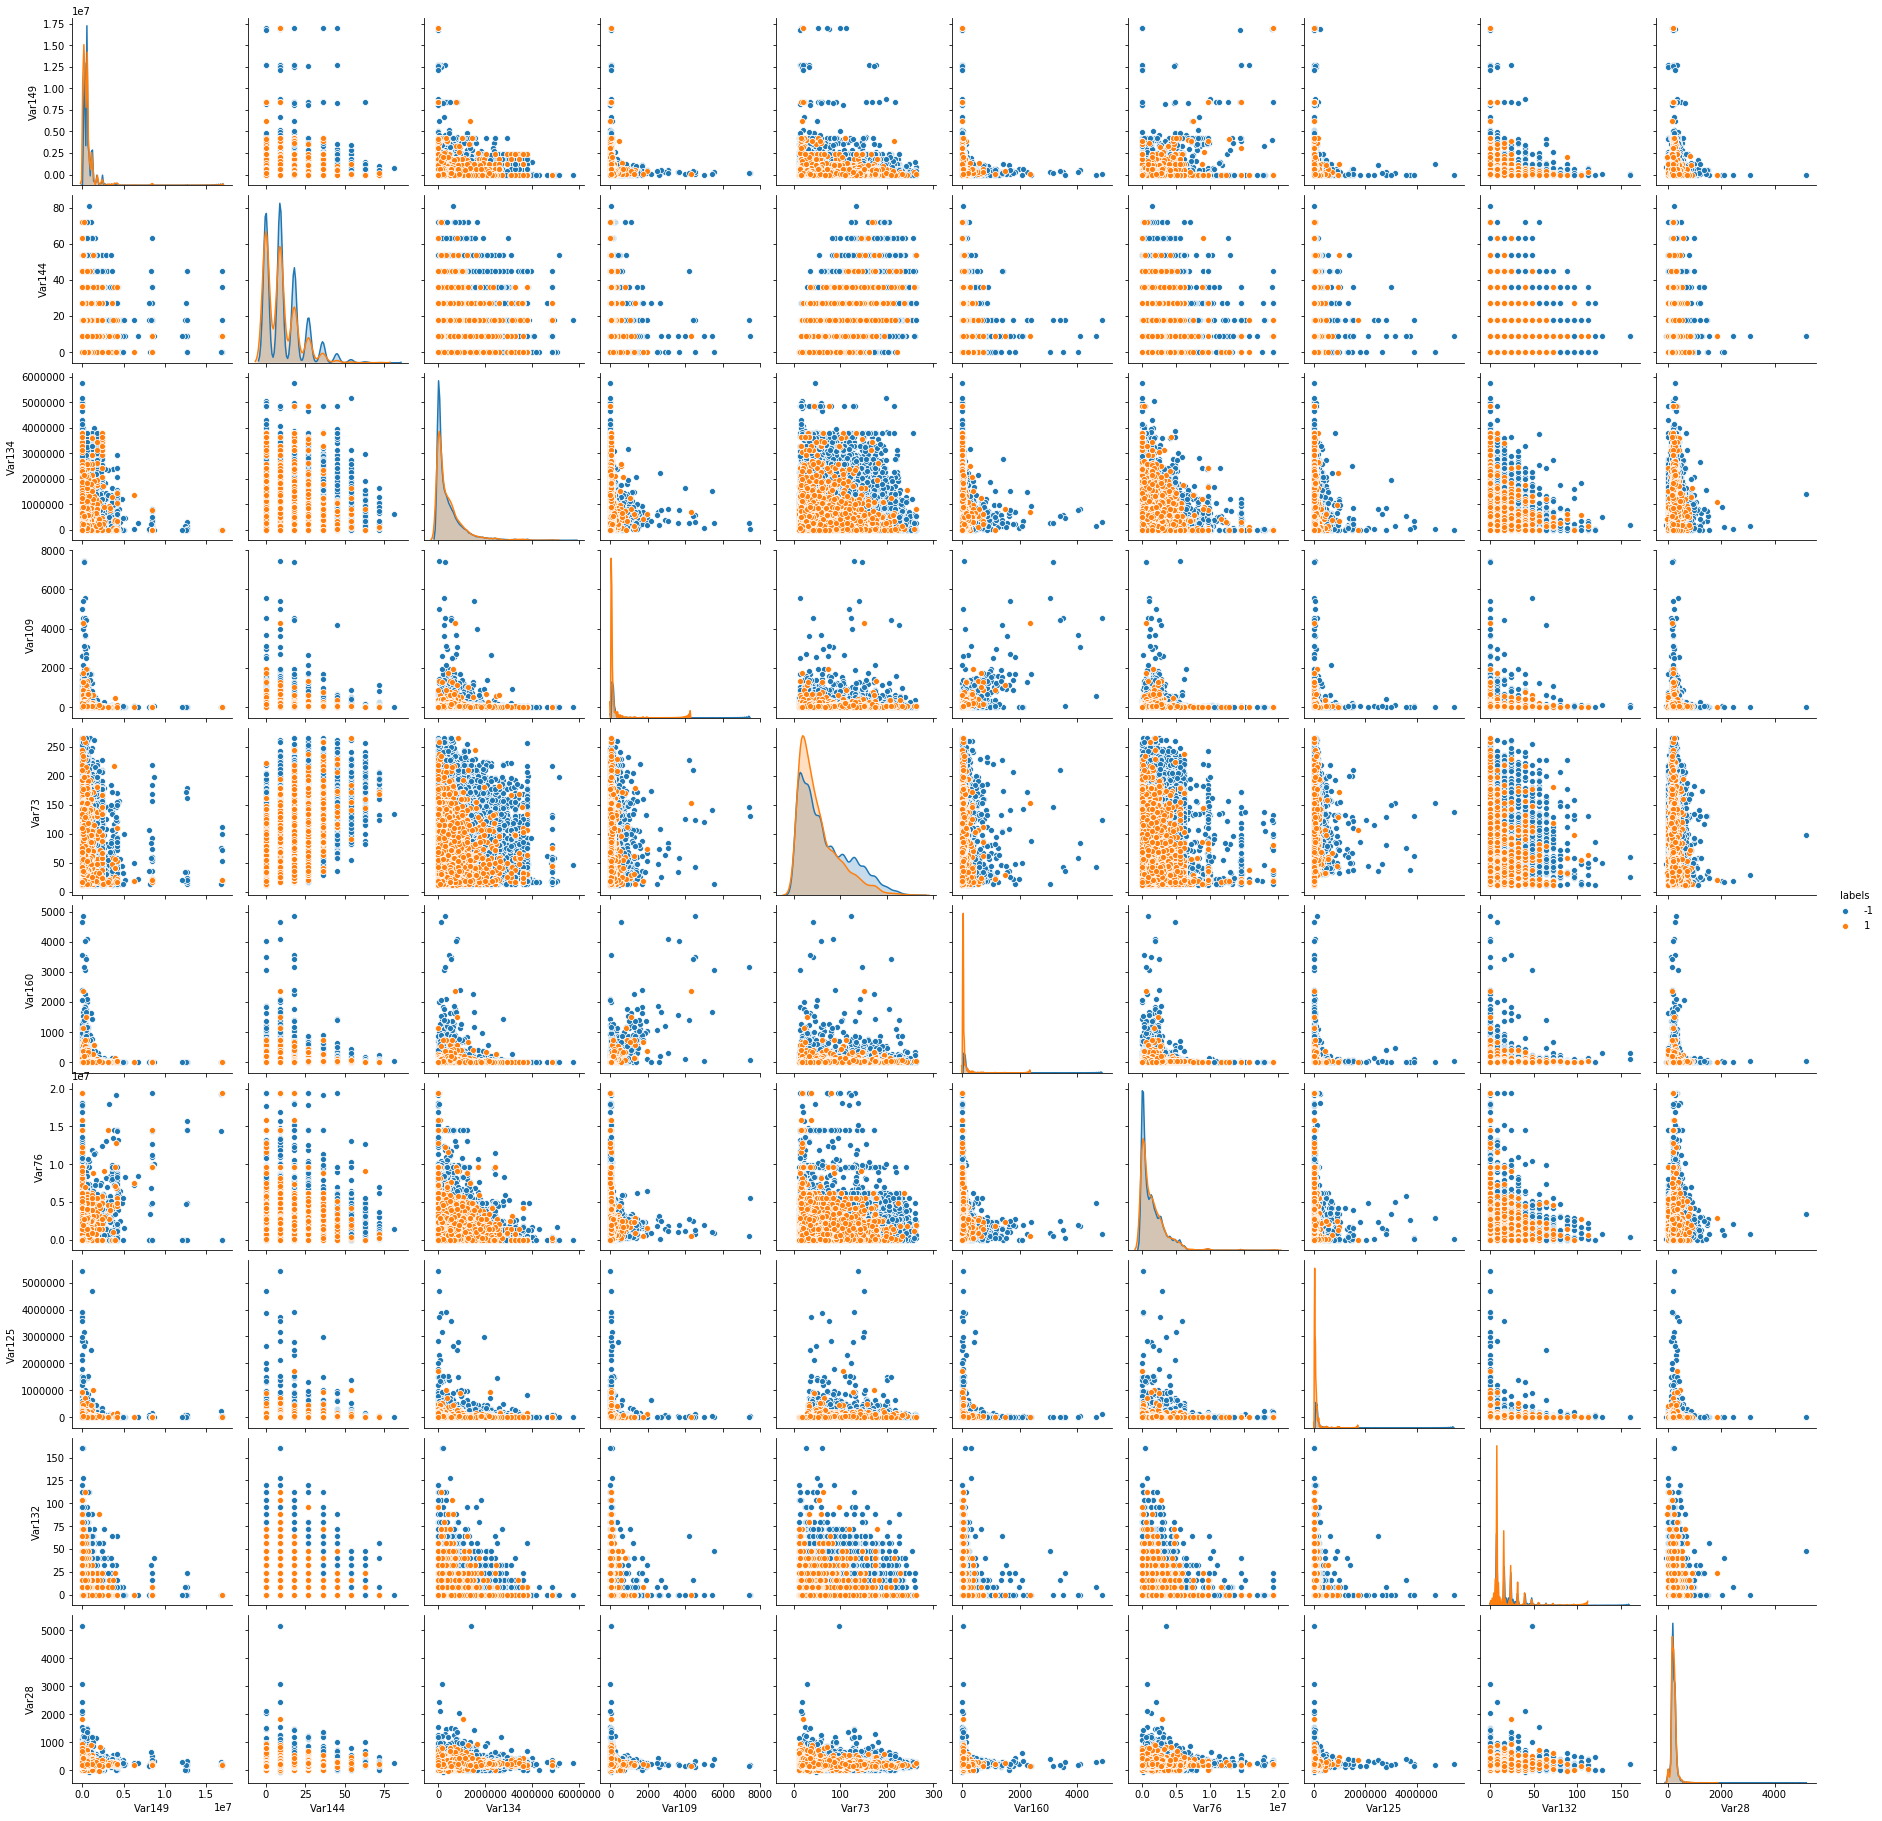

In [44]:
sns.pairplot(random_data, hue="labels")

C:\Users\MiPro\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\MiPro\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


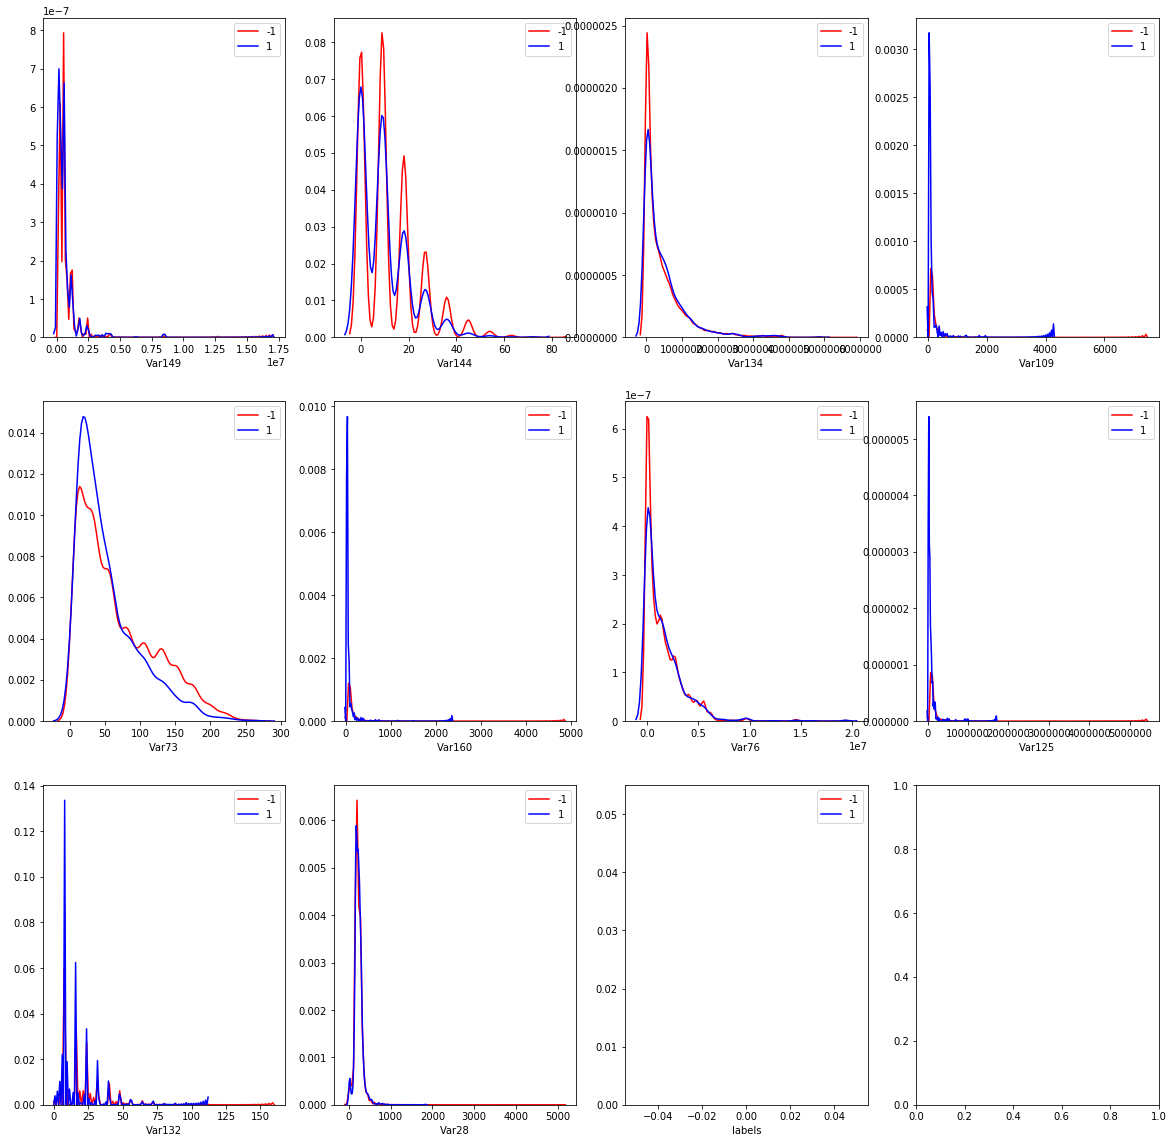

In [49]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
for idx, feature in enumerate(random_data):
    sns.kdeplot(num_data.loc[num_data.labels == -1, feature], color = 'r', ax=axes[int(idx / 4), int(idx % 4)], label=-1)
    sns.kdeplot(num_data.loc[num_data.labels == 1, feature], color = 'b', ax=axes[int(idx / 4), int(idx % 4)], label=1)
    axes[int(idx/ 4), int(idx % 4)].set(xlabel=feature)

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [20]:
correlation_desc = correlation.sort_values(['corr'], ascending = True)
correlation_desc

feature           corr label = 1 label = -1
10   Var44       0.003251      2789      33195
36  Var173       0.005087      2789      33195
37  Var181       0.020968      2789      33195
30  Var143       0.025356      2789      33195
11   Var57       0.026665      2976      37024
16   Var78       0.037651      2789      33195
8    Var35       0.087337      2789      33195
24  Var123       0.093576      2789      33195
26  Var132       0.315372      2789      33195
5    Var24       0.406398      2575      31609
19   Var85       0.770504      2789      33195
18   Var83       0.976093      2789      33195
12   Var65       1.621496      2745      32815
1     Var7       1.706359      2745      32815
31  Var144       2.344617      2759      32806
20  Var109       2.909023      2575      31609
21  Var112       3.350684      2789      33195
34  Var160       4.831922      2789      33195
7    Var28       5.559735      2789      33194
6    Var25       7.824903      2789      33195
13   Var73      14.021304      2976      37024
3    Var21      16.415344      2759      32806
4    Var22      20.092693      2789      33195
14   Var74      49.682563      2745      32815
23  Var119      89.535696      2759      32806
0     Var6     205.473217      2759      32806
29  Var140     446.201969      2745      32815
2    Var13     482.891378      2745      32815
25  Var125    5315.396947      2745      32815
35  Var163   10475.285968      2789      33195
27  Var133   12389.653531      2789      33195
17   Var81   14379.562165      2759      32806
28  Var134   14942.720027      2789      33195
32  Var149   29536.673807      2575      31609
15   Var76   56780.681291      2789      33195
9    Var38   77671.003559      2789      33195
33  Var153  151453.351963      2789      33195
22  Var113  162842.184538      2976      37024

In [21]:
desc10 = correlation.feature.iloc[-10:]
desc10['labels'] = ('labels')
desc10

5          Var24
26        Var132
24        Var123
8          Var35
16         Var78
11         Var57
30        Var143
37        Var181
36        Var173
10         Var44
labels    labels
Name: feature, dtype: object

In [22]:
num_data[desc10]

Var24  Var132  Var123  Var35  Var78     Var57  Var143  Var181  Var173  \
0       20.0     0.0    66.0    0.0    0.0  2.907926     0.0     0.0     0.0   
1        2.0     0.0    66.0    0.0    0.0  5.870327     0.0     0.0     0.0   
2        0.0     0.0    78.0    0.0    0.0  5.981628     0.0     0.0     0.0   
3        0.0     8.0    24.0    5.0    0.0  5.108097     0.0     0.0     0.0   
4        2.0     0.0    60.0    0.0    0.0  0.650716     0.0     0.0     0.0   
5        NaN     NaN     NaN    NaN    NaN  2.901517     NaN     NaN     NaN   
6        2.0     0.0   126.0    0.0    0.0  4.745567     0.0     0.0     0.0   
7        4.0     0.0    36.0    0.0    0.0  6.256569     0.0     0.0     0.0   
8        6.0     0.0    12.0    0.0    0.0  3.445845     0.0     0.0     0.0   
9        4.0     0.0    18.0    0.0    0.0  3.630421     0.0     0.0     0.0   
10       0.0     0.0    36.0    0.0    0.0  0.557146     0.0     0.0     0.0   
11       2.0     0.0    66.0    0.0    0.0  5.428113     0.0     0.0     0.0   
12       0.0    48.0    42.0    0.0   15.0  0.729759     0.0     7.0     0.0   
13       4.0     0.0    18.0    0.0    0.0  0.558000     0.0     0.0     0.0   
14      14.0     0.0     6.0    0.0    0.0  3.969665     0.0     0.0     0.0   
15       2.0     0.0    90.0    0.0    0.0  3.627430     0.0     0.0     0.0   
16       0.0     0.0     0.0    0.0    0.0  1.306772     0.0     0.0     0.0   
17       NaN     NaN     NaN    NaN    NaN  4.959624     NaN     NaN     NaN   
18       6.0     0.0    54.0    0.0    0.0  1.142491     0.0     0.0     0.0   
19       NaN     NaN     NaN    NaN    NaN  3.320444     NaN     NaN     NaN   
20       NaN     0.0     0.0    0.0    0.0  5.509934     0.0     0.0     0.0   
21       0.0    48.0     0.0    0.0    9.0  3.358470     0.0    14.0     2.0   
22       8.0     0.0   126.0    0.0    0.0  4.374279     0.0     0.0     0.0   
23       NaN     NaN     NaN    NaN    NaN  1.662679     NaN     NaN     NaN   
24       0.0     0.0     0.0    0.0    0.0  1.749626     0.0     0.0     0.0   
25      28.0     0.0    12.0    0.0    0.0  5.516129     0.0     0.0     0.0   
26       4.0     0.0    18.0    0.0    0.0  4.277719     0.0     0.0     0.0   
27       0.0     0.0   102.0    0.0    0.0  5.000214     0.0     0.0     0.0   
28      12.0     0.0     0.0    0.0    0.0  4.759666     0.0     0.0     0.0   
29       4.0     0.0   180.0    0.0    0.0  3.826960     0.0     0.0     0.0   
...      ...     ...     ...    ...    ...       ...     ...     ...     ...   
39970    0.0     0.0    18.0    0.0    0.0  5.997223     0.0     0.0     0.0   
39971    2.0     0.0    78.0    0.0    0.0  0.082675     0.0     0.0     0.0   
39972    0.0     0.0    96.0    0.0    0.0  3.996795     0.0     0.0     0.0   
39973    0.0    24.0    24.0    0.0    3.0  5.364879     0.0    14.0     0.0   
39974    6.0     8.0   156.0    5.0    0.0  2.560564     0.0     0.0     0.0   
39975    0.0     0.0     0.0    0.0    0.0  1.845546     0.0     0.0     0.0   
39976   10.0     0.0   204.0    0.0    0.0  0.398419     0.0     0.0     0.0   
39977    0.0     0.0     0.0    0.0    0.0  4.307840     0.0     0.0     0.0   
39978    0.0    32.0     0.0   10.0    3.0  1.089938     6.0     0.0     0.0   
39979    4.0     0.0    60.0    0.0    0.0  5.785089     0.0     0.0     0.0   
39980    2.0     8.0    48.0    5.0    0.0  1.638966     0.0     0.0     0.0   
39981    0.0     0.0     6.0    0.0    0.0  6.803675     0.0     0.0     0.0   
39982    2.0     0.0    90.0    0.0    0.0  2.045717     0.0     0.0     0.0   
39983    4.0     0.0   114.0    0.0    0.0  2.672933     0.0     0.0     0.0   
39984    NaN     0.0     0.0    0.0    0.0  3.611621     0.0     0.0     0.0   
39985    NaN     NaN     NaN    NaN    NaN  5.816492     NaN     NaN     NaN   
39986    0.0     0.0    30.0    0.0    0.0  4.188208     0.0     0.0     0.0   
39987    4.0     0.0   114.0    0.0    0.0  4.413373     0.0     0.0     0.0   
39988  

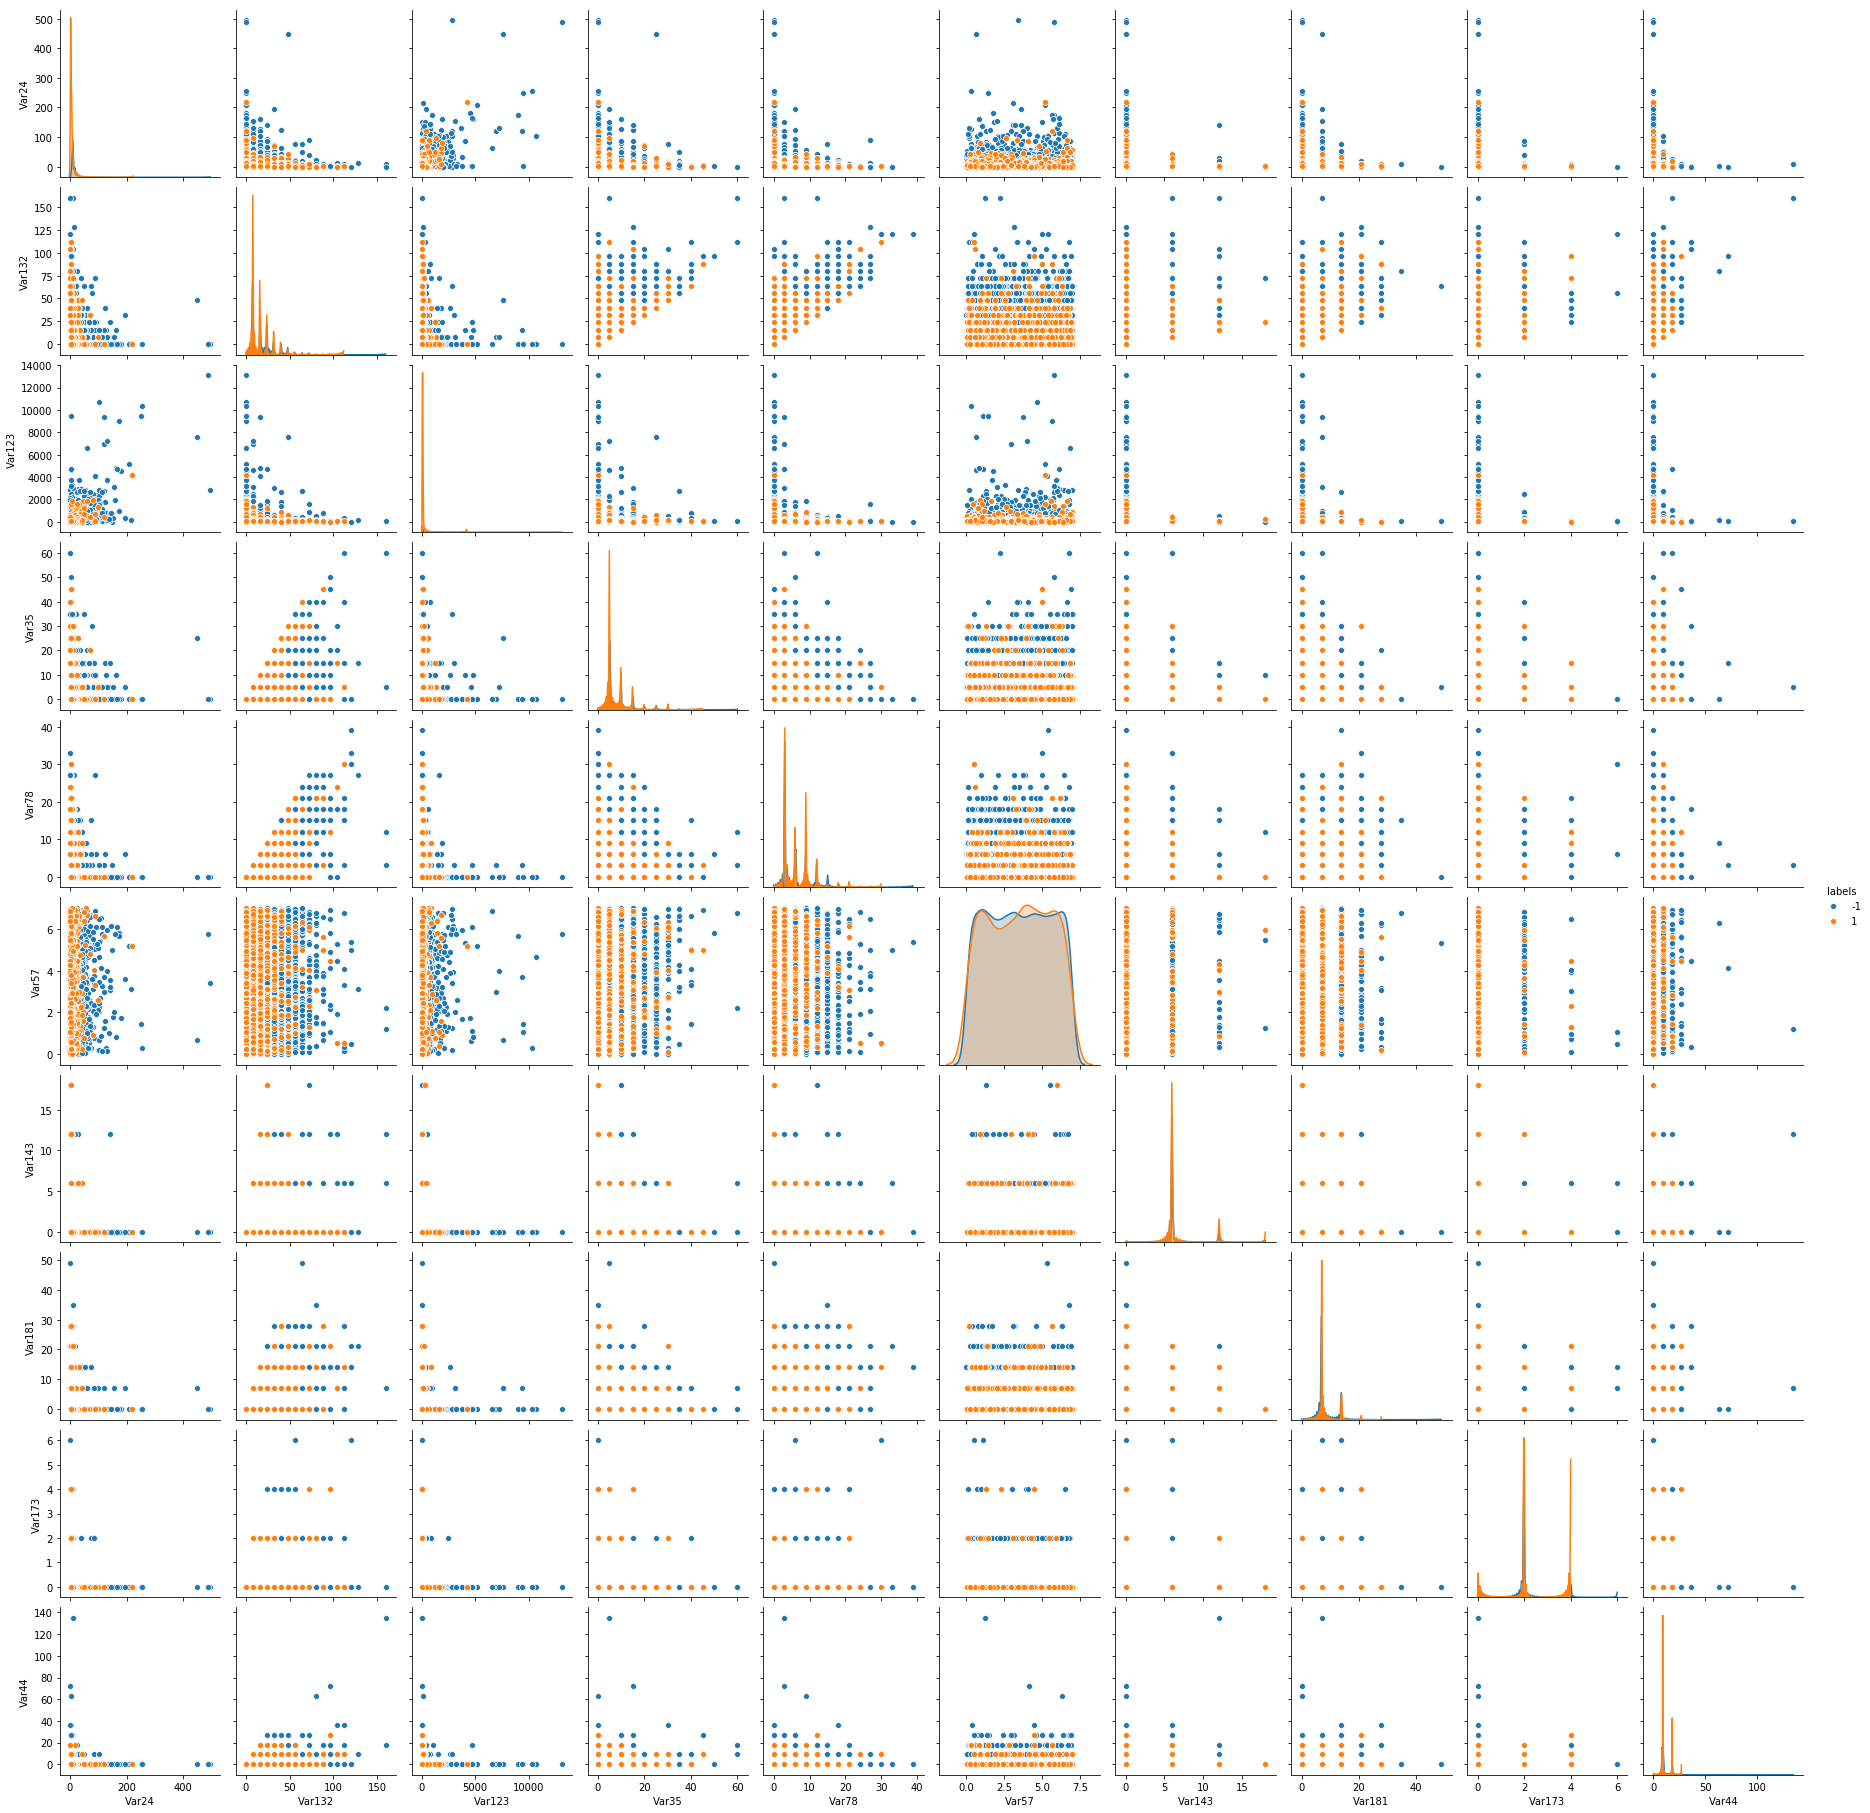

In [23]:
sns.pairplot(num_data[desc10], hue="labels")

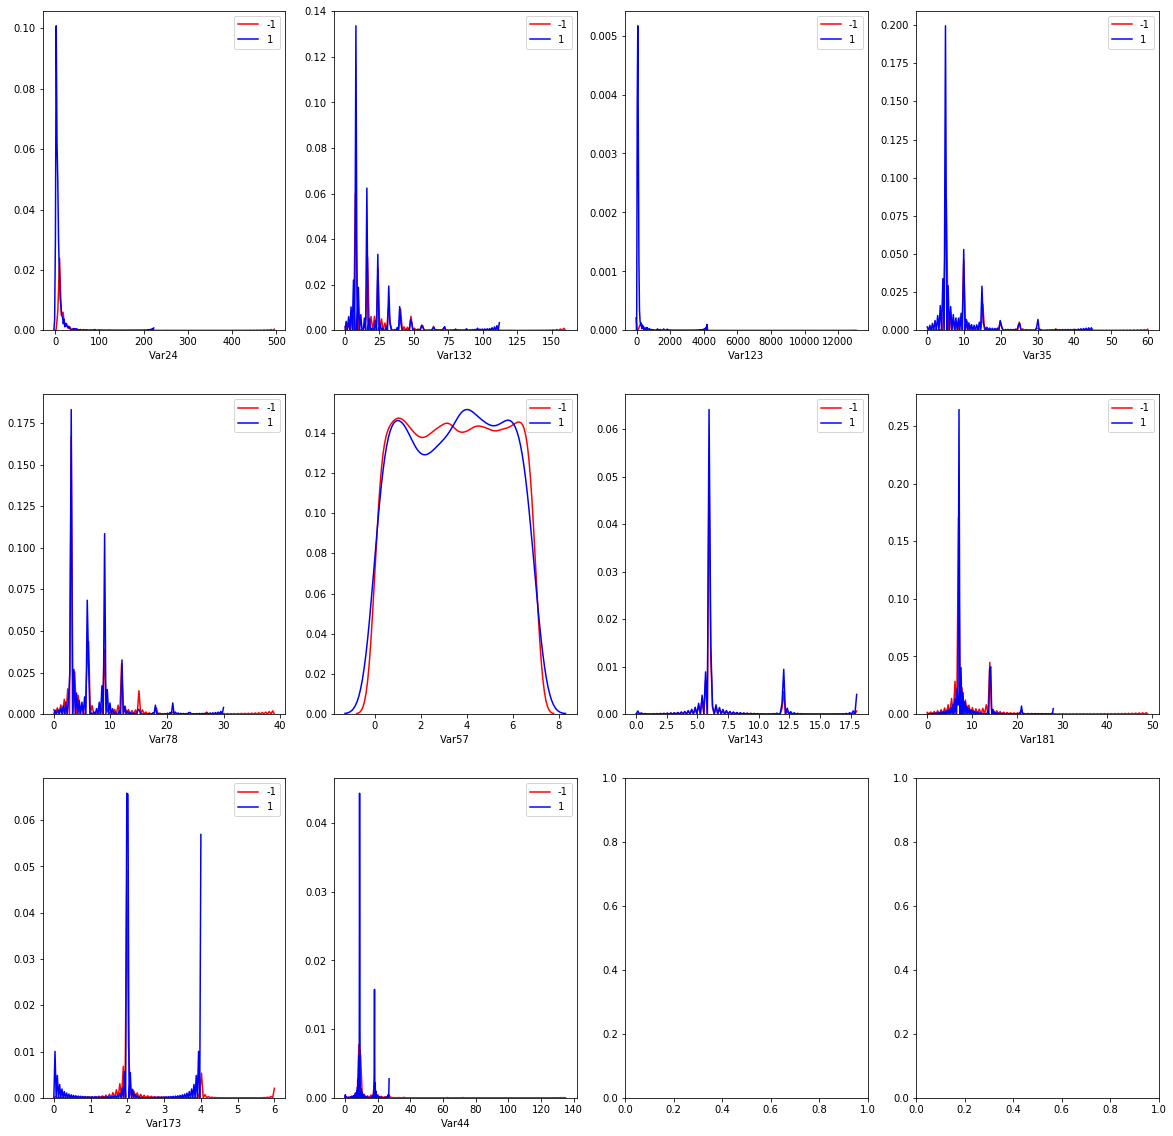

In [48]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
for idx, feature in enumerate(desc10[:10]):
    sns.kdeplot(num_data.loc[num_data.labels == -1, feature], color = 'r', ax=axes[int(idx / 4), int(idx % 4)], label=-1)
    sns.kdeplot(num_data.loc[num_data.labels == 1, feature], color = 'b', ax=axes[int(idx / 4), int(idx % 4)], label=1)
    axes[int(idx/ 4), int(idx % 4)].set(xlabel=feature)

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [4]:
features_cat = data.columns[190:]
features_cat

Index(['Var191', 'Var192', 'Var193', 'Var194', 'Var195', 'Var196', 'Var197',
       'Var198', 'Var199', 'Var200', 'Var201', 'Var202', 'Var203', 'Var204',
       'Var205', 'Var206', 'Var207', 'Var208', 'Var209', 'Var210', 'Var211',
       'Var212', 'Var213', 'Var214', 'Var215', 'Var216', 'Var217', 'Var218',
       'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var224', 'Var225',
       'Var226', 'Var227', 'Var228', 'Var229', 'Var230'],
      dtype='object')

In [5]:
# удаляем столбцы состоящие целиком из NaN
features_cat = features_cat[data[features_cat].dtypes == "object"]
features_cat

Index(['Var191', 'Var192', 'Var193', 'Var194', 'Var195', 'Var196', 'Var197',
       'Var198', 'Var199', 'Var200', 'Var201', 'Var202', 'Var203', 'Var204',
       'Var205', 'Var206', 'Var207', 'Var208', 'Var210', 'Var211', 'Var212',
       'Var213', 'Var214', 'Var215', 'Var216', 'Var217', 'Var218', 'Var219',
       'Var220', 'Var221', 'Var222', 'Var223', 'Var224', 'Var225', 'Var226',
       'Var227', 'Var228', 'Var229'],
      dtype='object')

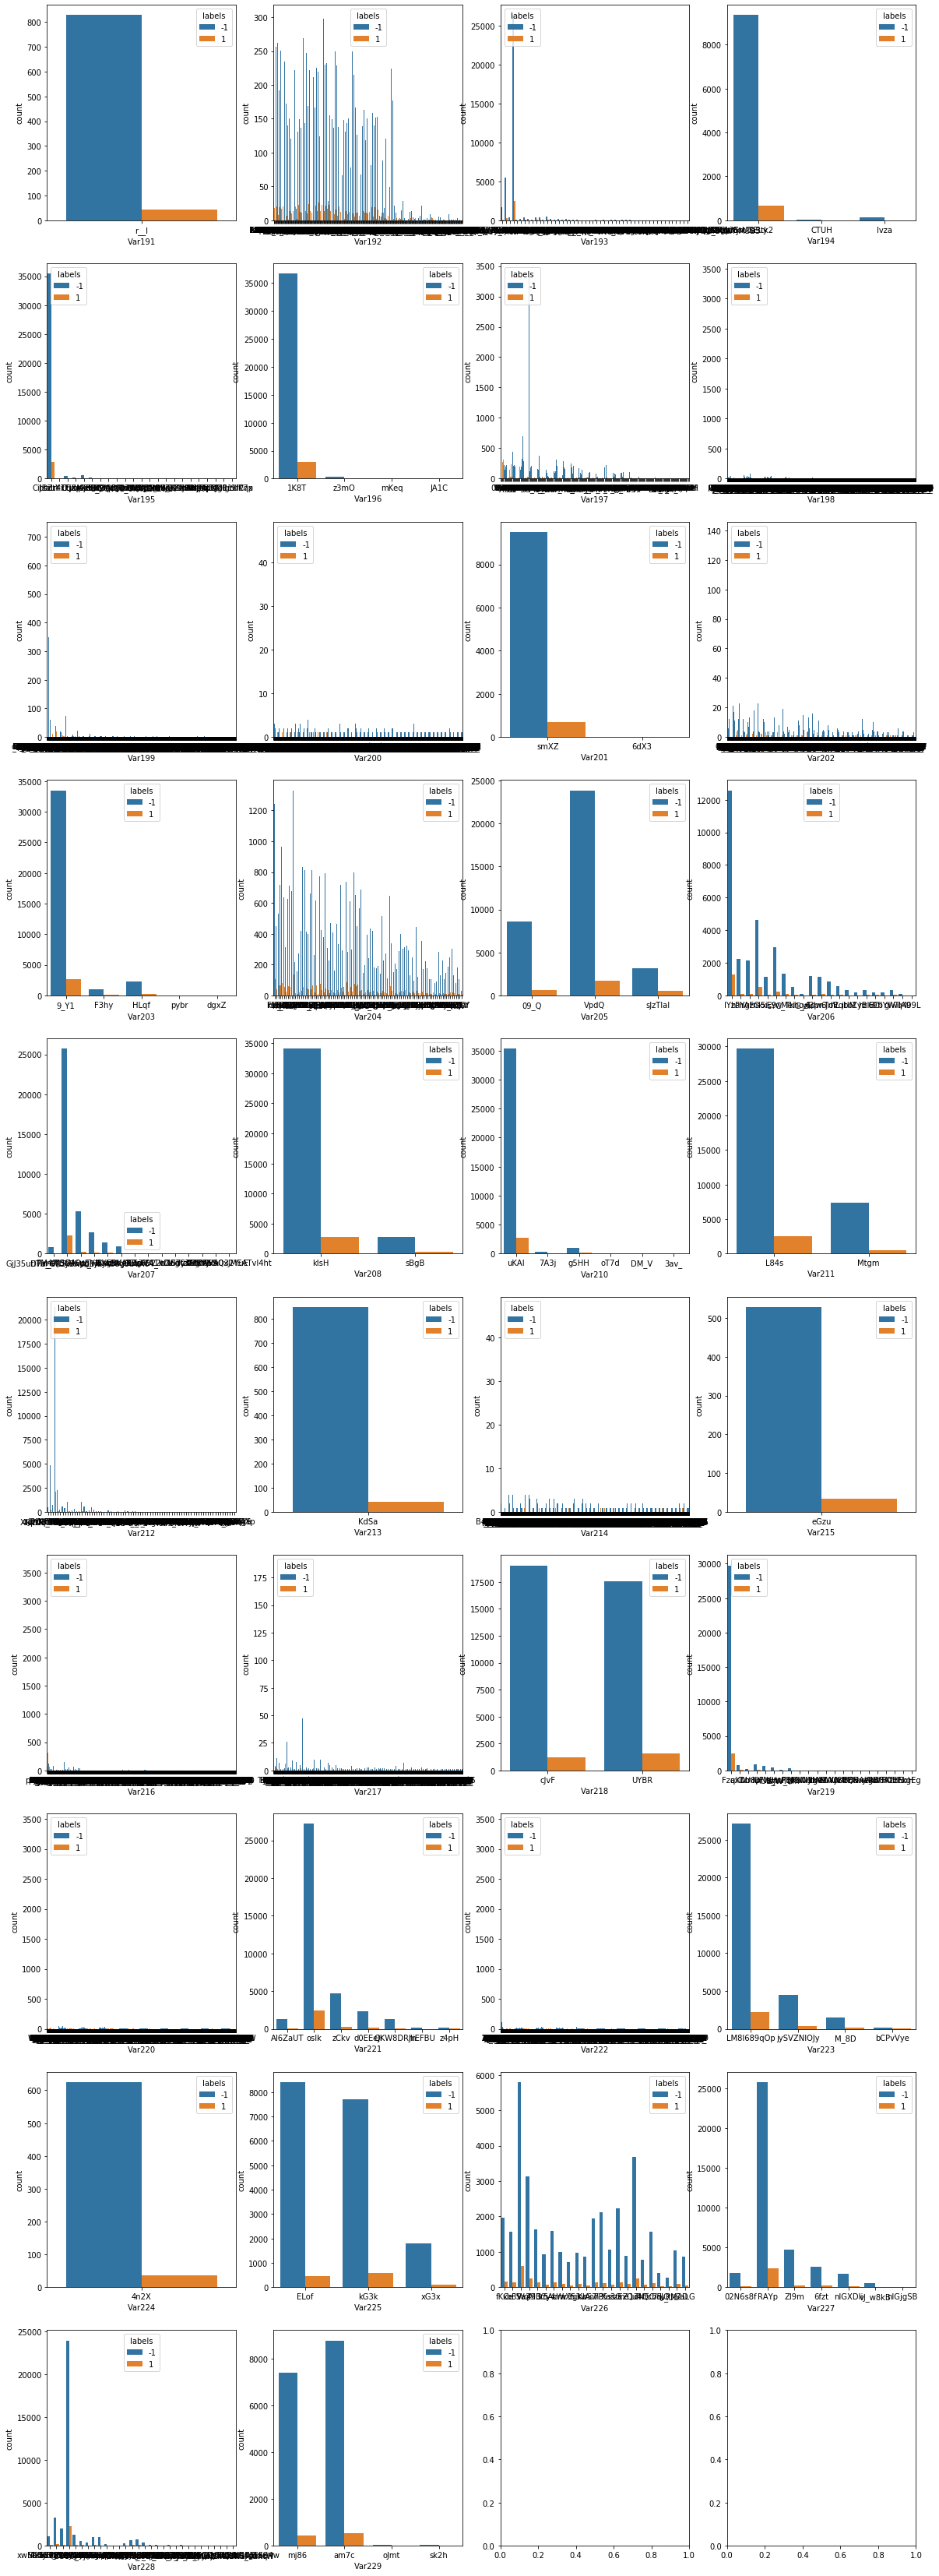

In [8]:
fig, axes = plt.subplots(10, 4, figsize=(20, 60))
for i, feature in enumerate(features_cat):
    sns.countplot(x=feature, data=cat_data, ax=axes[int(i / 4), int(i % 4)],hue='labels')

In [13]:
cat_data_good = []
for col in cat_data.columns:
    if len(np.unique(cat_data[col].astype(str))) > 1 and len(np.unique(cat_data[col].astype(str))) < 7:
        cat_data_good.append(col)

In [16]:
cat_data[cat_data_good]

Var191 Var194 Var196 Var201 Var203   Var205 Var208 Var210 Var211 Var213  \
0        NaN    NaN   1K8T    NaN   9_Y1     09_Q   kIsH   uKAI   L84s    NaN   
1        NaN    NaN   1K8T    NaN   9_Y1     VpdQ   kIsH   uKAI   L84s    NaN   
2        NaN    NaN   1K8T    NaN   9_Y1     VpdQ   kIsH   uKAI   L84s    NaN   
3        NaN    NaN   1K8T    NaN   F3hy     VpdQ   kIsH   uKAI   L84s    NaN   
4        NaN    NaN   1K8T    NaN   9_Y1  sJzTlal   kIsH   uKAI   L84s    NaN   
...      ...    ...    ...    ...    ...      ...    ...    ...    ...    ...   
39995    NaN   SEuy   1K8T   smXZ   9_Y1     VpdQ   kIsH   7A3j   L84s    NaN   
39996    NaN    NaN   1K8T    NaN   9_Y1     VpdQ   kIsH   uKAI   L84s    NaN   
39997    NaN    NaN   1K8T    NaN   9_Y1     09_Q   kIsH   uKAI   L84s    NaN   
39998    NaN    NaN   1K8T    NaN   9_Y1     VpdQ   kIsH   uKAI   L84s    NaN   
39999    NaN    NaN   1K8T    NaN   9_Y1     VpdQ   kIsH   uKAI   Mtgm    NaN   

      Var215 Var218      Var223 Var224 Var225 Var229  labels  
0        NaN   cJvF  LM8l689qOp    NaN    NaN    NaN      -1  
1        NaN   cJvF  LM8l689qOp    NaN   ELof   mj86      -1  
2        NaN   UYBR  LM8l689qOp    NaN    NaN   mj86      -1  
3        NaN   cJvF  LM8l689qOp    NaN    NaN    NaN       1  
4        NaN   cJvF  LM8l689qOp    NaN    NaN    NaN      -1  
...      ...    ...         ...    ...    ...    ...     ...  
39995    NaN   UYBR  LM8l689qOp    NaN   kG3k   mj86      -1  
39996    NaN   cJvF  LM8l689qOp    NaN    NaN    NaN      -1  
39997    NaN   cJvF  LM8l689qOp    NaN   ELof   am7c      -1  
39998    NaN   cJvF  LM8l689qOp    NaN    NaN    NaN      -1  
39999    NaN   UYBR  LM8l689qOp    NaN    NaN    NaN      -1  

[40000 rows x 17 columns]

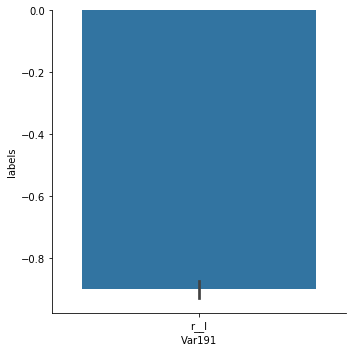

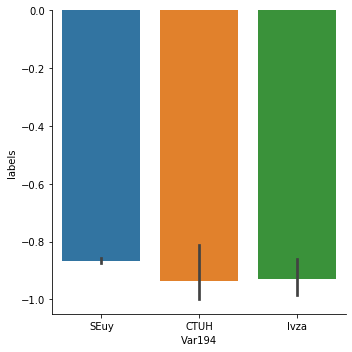

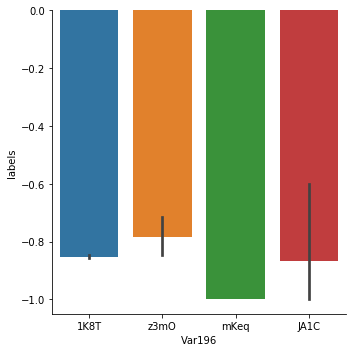

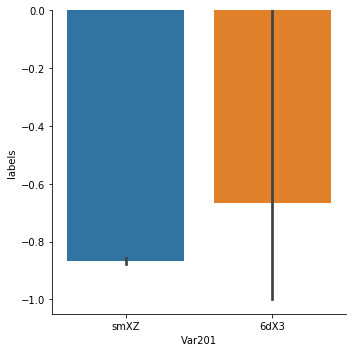

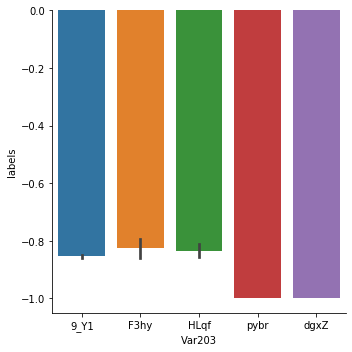

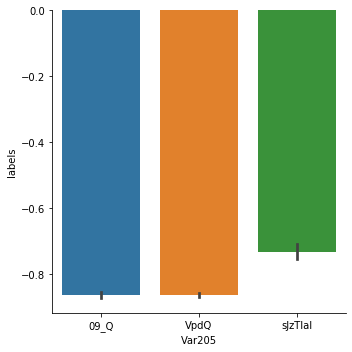

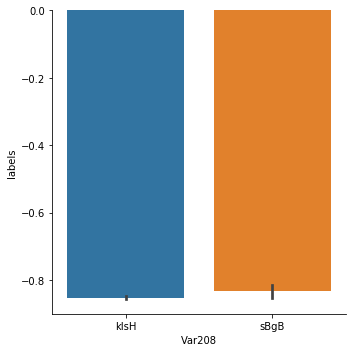

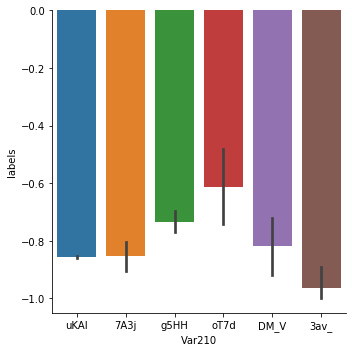

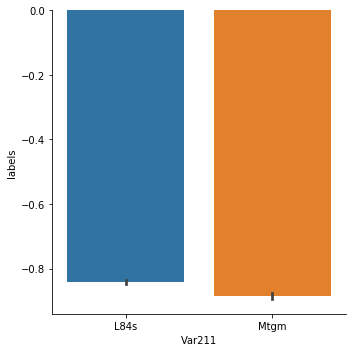

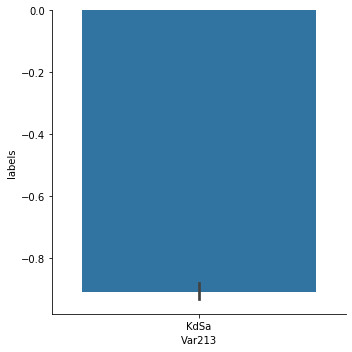

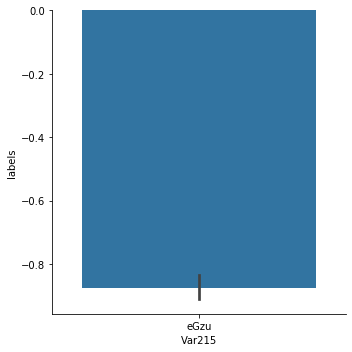

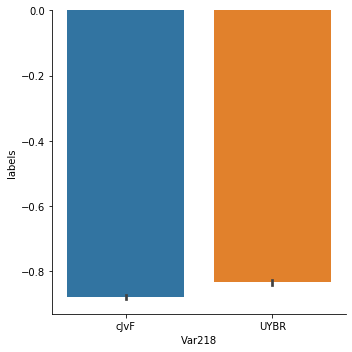

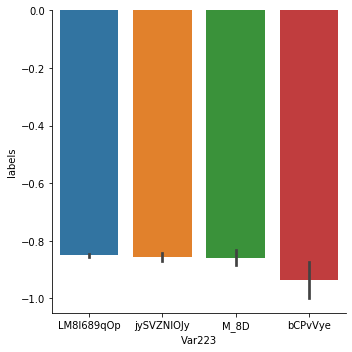

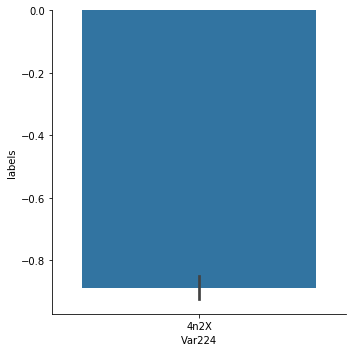

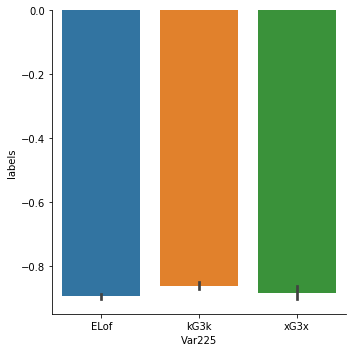

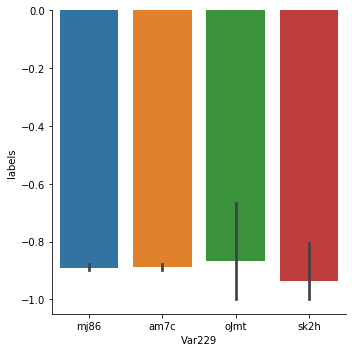

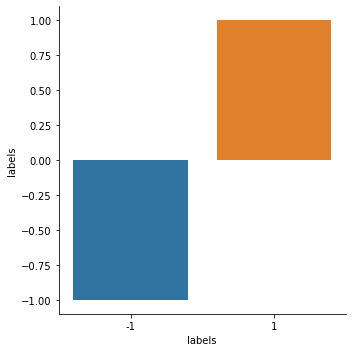

In [17]:

for i,var in enumerate(cat_data_good):
    sns.catplot(x= var, y = "labels", data = cat_data, kind = "bar",)

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

### Выводы по результатам описательного анализа данных

Большая часть представленных данных вероятнее всего будет не информативна ввиду большого количества пропущенных значений. В тоже время в данных с небольшим количеством пропусков наблюдается различие в плотности распределения целевой переменной, что может является основанием для включения признаков в модель. 

Наиболее полезными числовыми признаками являются признаками с небольшим количеством пропущенных значений (величину такого порога необходимо определить дополнительно). Среди категориальных признаком наибольший интерес представляют признаки с небольшим количеством уникальных значений.

Наименее информативными представляются признаки, состоящие преимущественно из NaN значений и категориальные признаки, состоящие из очень большого числа уникальных значений.

Отбор признаков будет полезен при построении модели. Осталось в этом только убедиться.
